# eFEL Metric

In [1]:
import pandas as pd
import numpy as np

In [2]:
from brian2 import *
prefs.codegen.target = 'cython'  # weave is not multiprocess-safe!


In [3]:
import matplotlib.pyplot as plt

import efel

### Load Input and Output

In [4]:
df_inp_traces = pd.read_csv('input_traces_hh.csv')
df_out_traces = pd.read_csv('output_traces_hh.csv')

In [5]:
out_traces0 = df_out_traces.to_numpy()
out_traces0 = out_traces0[:, 1:]
out_traces0

array([[-63.54211145, -65.52491616, -62.90054542, ..., -81.5252667 ,
        -82.30107475, -82.04870895],
       [-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
        -65.13069593, -64.48718384],
       [-62.92648395, -65.82540807, -64.76394825, ..., -64.9418292 ,
        -63.8704734 , -63.17105741],
       [-64.51645049, -66.84945425, -64.64260378, ..., -80.91299455,
        -79.08977935, -82.01562544],
       [-65.57417095, -65.68558642, -65.67498994, ..., -59.60054522,
        -60.47494105, -60.01392187]])

In [6]:
inp_traces0 = df_inp_traces.to_numpy()
inp_traces0 = inp_traces0[:4, 1:]
inp_traces0

array([[0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00],
       [2.e-09, 2.e-09, 2.e-09, ..., 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, ..., 0.e+00, 0.e+00, 0.e+00]])

## Generate the Data

In [7]:
# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV
params_correct = {'gl': float(10e-5*siemens*cm**-2 * area),
                  'g_na': float(200*msiemens*cm**-2 * area),
                  'g_kd': float(55*msiemens*cm**-2 * area)}

dt = 0.01*ms

In [8]:
# Generate a step-current input and an "experimental" voltage trace
input_current0 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*10
input_current1 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*2
input_current2 = np.hstack([np.ones(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*2
input_current3 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*50
input_current4 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA*0.2

input_current = np.stack((input_current0, input_current1, input_current2, input_current3, input_current4))

In [9]:
defaultclock.dt = dt

In [10]:
# The model
eqsHH = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I(t))/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+ VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

In [11]:
I = TimedArray(input_current0, dt=dt)

G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)
run(20*ms)

voltage = mon.v[0]/mV
voltage += np.random.randn(len(voltage))


inp_trace0 = np.array([input_current0])
n0, n1 = inp_trace0.shape

out_trace0 = np.array(voltage[:n1])

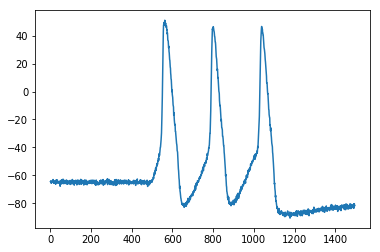

In [12]:
plot(out_trace0);

In [13]:
start_scope()
I = TimedArray(input_current1, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(20*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace1 = np.array([input_current1])
n0, n1 = inp_trace1.shape
out_trace1 = np.array(voltage[:n1])

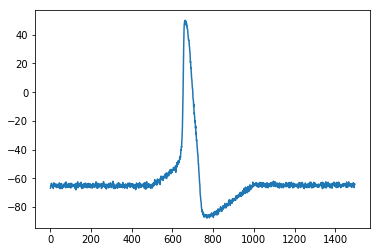

In [14]:
plot(out_trace1);

In [15]:
start_scope()
I = TimedArray(input_current2, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(20*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace2 = np.array([input_current2])
n0, n1 = inp_trace2.shape
out_trace2 = np.array(voltage[:n1])

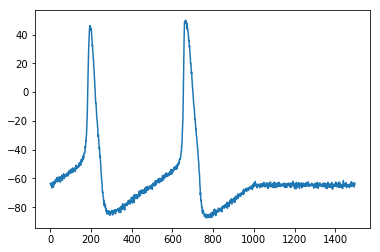

In [16]:
plot(out_trace2);

In [17]:
start_scope()
I = TimedArray(input_current3, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(30*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace3 = np.array([input_current3])
n0, n1 = inp_trace3.shape
out_trace3 = np.array(voltage[:n1])

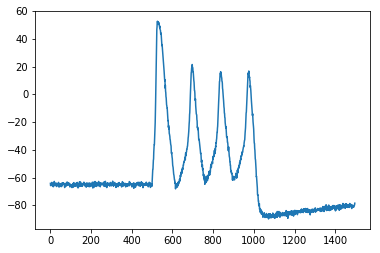

In [18]:
plot(out_trace3);

In [19]:
start_scope()
I = TimedArray(input_current4, dt=dt)
G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)

run(30*ms)

voltage = mon.v[0]/mV

voltage += np.random.randn(len(voltage))
inp_trace4 = np.array([input_current4])
n0, n1 = inp_trace4.shape
out_trace4 = np.array(voltage[:n1])

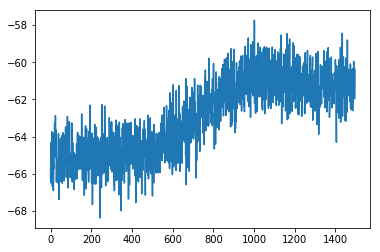

In [20]:
plot(out_trace4);

In [21]:
inp_traces = np.stack((inp_trace0[0], inp_trace1[0], inp_trace2[0], inp_trace3[0], inp_trace4[0]))
np.shape(inp_traces)

(5, 1497)

In [22]:
out_traces = np.stack((out_trace0, out_trace1, out_trace2, out_trace3,out_trace4))
np.shape(out_traces)

(5, 1497)

## Visualize all the Traces

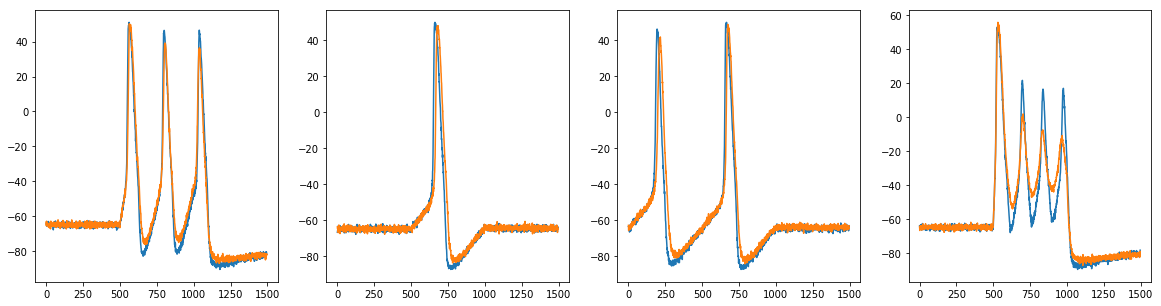

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
ax[0].plot(out_traces[0])
ax[1].plot(out_traces[1])
ax[2].plot(out_traces[2])
ax[3].plot(out_traces[3])

ax[0].plot(out_traces0[0])
ax[1].plot(out_traces0[1])
ax[2].plot(out_traces0[2])
ax[3].plot(out_traces0[3]);


In [24]:
time = np.arange(0, len(out_traces[0])/10, 0.1)

In [25]:
traces_times = [[50, 100], [50, 100], [50, 100], [50, 100], [50, 100]]

In [26]:
traces = []
for i, trace in enumerate(out_traces):
    temp_trace = {}
    temp_trace['T'] = time
    temp_trace['V'] = trace
    temp_trace['stim_start'] = [traces_times[i][0]]
    temp_trace['stim_end'] = [traces_times[i][1]]
    traces.append(temp_trace)


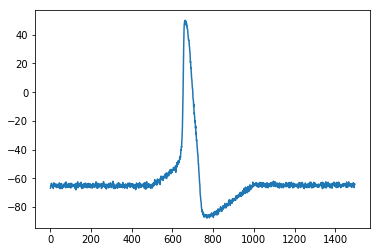

In [40]:
plot(traces[1]['V'])

In [105]:
from brian2 import *
from brian2modelfitting import *
prefs.codegen.target = 'cython'  # weave is not multiprocess-safe!


# Parameters
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
VT = -63*mV
dt = 0.01*ms

# Generate a step-current input and an "experimental" voltage trace
input_current0 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt))])*nA
input_current1 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt))*2, np.zeros(int(5*ms/dt))])*nA

input_current2 = np.stack((input_current0, input_current1))

params_correct = {'gl': float(5e-5*siemens*cm**-2 * area),
                  'g_na': float(100*msiemens*cm**-2 * area),
                  'g_kd': float(30*msiemens*cm**-2 * area)}

# input_current0 = np.hstack([np.zeros(int(5*ms/dt)), np.ones(int(5*ms/dt)), np.zeros(int(5*ms/dt)),np.zeros(int(5*ms/dt)),np.ones(int(5*ms/dt)),np.zeros(int(5*ms/dt))])*nA

defaultclock.dt = dt

# The model
eqsHH = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I(t))/Cm : volt
dm/dt = 0.32*(mV**-1)*(13.*mV-v+VT)/
    (exp((13.*mV-v+VT)/(4.*mV))-1.)/ms*(1-m)-0.28*(mV**-1)*(v-VT-40.*mV)/
    (exp((v-VT-40.*mV)/(5.*mV))-1.)/ms*m : 1
dn/dt = 0.032*(mV**-1)*(15.*mV-v+VT)/
    (exp((15.*mV-v+VT)/(5.*mV))-1.)/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
g_na : siemens (constant)
g_kd : siemens (constant)
gl   : siemens (constant)
''')

I = TimedArray(input_current0, dt=dt)

G = NeuronGroup(1, eqsHH, method='exponential_euler')
G.v = El
G.set_states(params_correct, units=False)
mon = StateMonitor(G, 'v', record=0)
run(20*ms)

voltage = mon.v[0]

In [112]:
np.asarray(voltage) * 1000


array([-65.        , -65.        , -65.        , ..., -74.45678717,
       -74.45205975, -74.44733469])

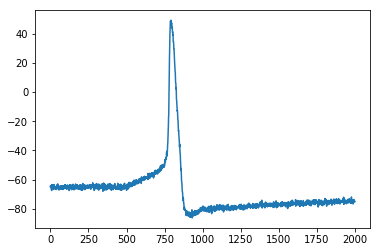

In [92]:
voltage += np.random.randn(len(voltage))

plot(voltage);

In [93]:
# fl = ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
#                                                  'AP_begin_voltage', 'mean_frequency']
fl = ['mean_AP_amplitude', 'voltage_base', 'mean_frequency']


In [94]:
def calculate_features(traces, inp_times, feat_list):
    out_traces = []
    for i, trace in enumerate(traces):
        time = np.arange(0, len(trace)/10, 0.1)
        temp_trace = {}
        temp_trace['T'] = time
        temp_trace['V'] = trace
        temp_trace['stim_start'] = [inp_times[i][0]]
        temp_trace['stim_end'] = [inp_times[i][1]]
        out_traces.append(temp_trace)

    results = efel.getFeatureValues(out_traces, feat_list)

    return results

In [95]:
feat_list = ['voltage_base', 'AP_amplitude', 'AP_duration',  'AP_begin_time', 'time_to_first_spike', 'Spikecount',  'AP_amplitude_from_voltagebase',]

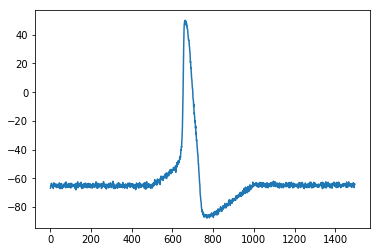

In [96]:
plot(traces[1]['V'])

In [97]:
calculate_features([voltage], [[50,100]], feat_list)

[{'voltage_base': array([-65.15663519]),
  'AP_amplitude': array([90.01800691]),
  'AP_duration': array([2.6]),
  'AP_begin_time': array([76.8]),
  'time_to_first_spike': array([29.2]),
  'Spikecount': array([1]),
  'AP_amplitude_from_voltagebase': array([114.36410723])}]

In [98]:
res_data = calculate_features(out_traces0, traces_times, fl)
res_data

WARNING    /home/alteska/.local/lib/python3.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature mean_AP_amplitude: AP_amplitude: More peak_voltage entries during the stimulus than AP_begin_indices entries
Feature [AP_amplitude] is missing
Error calculating AP_amplitude for mean_AP_amplitude
  RuntimeWarning)
 [py.warnings]
WARNING    /home/alteska/.local/lib/python3.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature mean_AP_amplitude: 
Voltage never goes below or above threshold in spike detection.

 At least one spike required for calculation of min_AHP_indices.

Feature [min_AHP_indices] is missing

Feature [peak_voltage] is missing
AP_amplitude: Error calculating peak_voltage
Feature [AP_amplitude] is missing
Error calculating AP_amplitude for mean_AP_amplitude
  RuntimeWarning)
 [py.warnings]
WARNING    /home/alteska/.local/lib/python3.7/site-packages/efel/api.py:480: RuntimeWarning: Error while calculating feature mean_fre

[{'mean_AP_amplitude': array([84.09934389]),
  'voltage_base': array([-65.02022173]),
  'mean_frequency': array([65.1465798])},
 {'mean_AP_amplitude': array([85.66269442]),
  'voltage_base': array([-64.98160648]),
  'mean_frequency': array([54.94505495])},
 {'mean_AP_amplitude': array([85.78382778]),
  'voltage_base': array([-66.86791073]),
  'mean_frequency': array([57.47126437])},
 {'mean_AP_amplitude': None,
  'voltage_base': array([-64.8898122]),
  'mean_frequency': array([104.38413361])},
 {'mean_AP_amplitude': None,
  'voltage_base': array([-64.76630735]),
  'mean_frequency': None}]

In [32]:
for r in res:
    for k, v in r.items():
        if v is None:
            print('None')
            r[k] = np.array([9999])
        if (len(r[k])) > 1:
            print('you can only use features that return one value')
        

None
None
None


In [33]:
res

[{'mean_AP_amplitude': array([90.65385893]),
  'voltage_base': array([-65.06551091]),
  'mean_frequency': array([66.66666667])},
 {'mean_AP_amplitude': array([9999]),
  'voltage_base': array([-65.07463011]),
  'mean_frequency': array([94.78672986])},
 {'mean_AP_amplitude': array([91.19923478]),
  'voltage_base': array([-67.64327968]),
  'mean_frequency': array([60.60606061])},
 {'mean_AP_amplitude': array([69.50319935]),
  'voltage_base': array([-65.01847085]),
  'mean_frequency': array([84.21052632])},
 {'mean_AP_amplitude': array([9999]),
  'voltage_base': array([-64.87006918]),
  'mean_frequency': array([9999])}]

In [34]:
def combine(x, y):
    return x - y   

In [35]:
def feat_to_err(d1, d2):
    d={}
    err = 0
    for key in d1.keys():
        x = d1[key]
        y = d2[key]
        d[key] = combine(x, y)
        
    for k, v in d.items():
        err += sum(v)

    return err

In [36]:
feat_to_err(res[0], res_data[1])

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

In [ ]:
errors = []
for X in zip(res, res_data):
    err = feat_to_err(X[0], X[1])
    errors.append(err)

In [ ]:
error = sum(errors)
error